In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score)

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
# Cell 7 - Check target distribution
print("Target Distribution:")
print(df['target'].value_counts())
print(f"\nClass 0 (No Disease): {(df['target']==0).sum()} ({(df['target']==0).sum()/len(df)*100:.1f}%)")
print(f"Class 1 (Heart Disease): {(df['target']==1).sum()} ({(df['target']==1).sum()/len(df)*100:.1f}%)")

Target Distribution:
target
1    629
0    561
Name: count, dtype: int64

Class 0 (No Disease): 561 (47.1%)
Class 1 (Heart Disease): 629 (52.9%)


/tmp/ipykernel_22074/703469029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


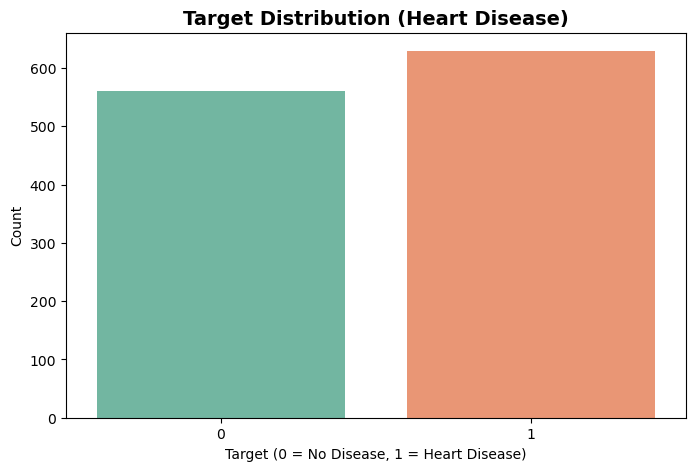

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Target Distribution (Heart Disease)', fontsize=14, fontweight='bold')
plt.xlabel('Target (0 = No Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

In [9]:
# Cell: Correlation with target
correlations = df.corr()['target'].sort_values(ascending=False)
print("Features most correlated with Heart Disease:")
print(correlations)

Features most correlated with Heart Disease:
target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64


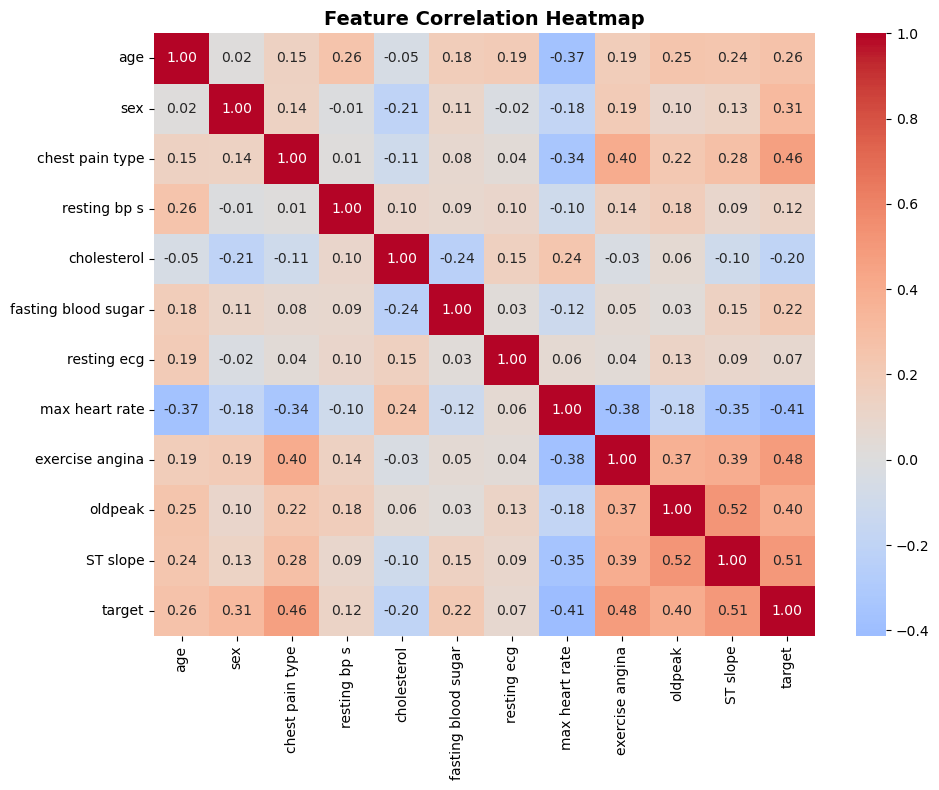

In [10]:
# Cell: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
feature_columns = [col for col in df.columns if col != 'target']

In [12]:
print(f"📋 Using {len(feature_columns)} features:")
for i, feat in enumerate(feature_columns, 1):
    corr = df.corr()['target'][feat]
    strength = "🔴 Strong" if abs(corr) > 0.4 else "🟡 Moderate" if abs(corr) > 0.2 else "⚪ Weak"
    print(f"  {i:2d}. {feat:25s} {strength} (corr: {corr:+.3f})")

X = df[feature_columns]
y = df['target']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

📋 Using 11 features:
   1. age                       🟡 Moderate (corr: +0.262)
   2. sex                       🟡 Moderate (corr: +0.311)
   3. chest pain type           🔴 Strong (corr: +0.460)
   4. resting bp s              ⚪ Weak (corr: +0.121)
   5. cholesterol               ⚪ Weak (corr: -0.198)
   6. fasting blood sugar       🟡 Moderate (corr: +0.217)
   7. resting ecg               ⚪ Weak (corr: +0.073)
   8. max heart rate            🔴 Strong (corr: -0.413)
   9. exercise angina           🔴 Strong (corr: +0.481)
  10. oldpeak                   🟡 Moderate (corr: +0.398)
  11. ST slope                  🔴 Strong (corr: +0.506)

X shape: (1190, 11)
y shape: (1190,)


In [13]:
# Cell: Feature Scaling
print("🔧 Scaling features using StandardScaler...")
print("\n💡 Why scaling is important:")
print("   • ST slope ranges: 1-3")
print("   • Max heart rate ranges: 71-202")
print("   • Different scales slow down Gradient Descent!")
print("   • StandardScaler makes all features mean=0, std=1")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_columns)

print("\nScaling complete!")
print("\nBefore vs After (first 3 samples):")
print("\nBefore:")
print(X.head(3))
print("\nAfter (standardized):")
print(X_scaled.head(3))

🔧 Scaling features using StandardScaler...

💡 Why scaling is important:
   • ST slope ranges: 1-3
   • Max heart rate ranges: 71-202
   • Different scales slow down Gradient Descent!
   • StandardScaler makes all features mean=0, std=1

Scaling complete!

Before vs After (first 3 samples):

Before:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  
0            0             172                0      0.0         1  
1            0             156                0      1.0         2  
2            1              98                0      0.0         1  

After (standardized):
        age       sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728

In [14]:
# Cell: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keeps 47-53 balance in both sets!
)

print("Data split complete!")
print(f"\n📚 Training set: {X_train.shape[0]} samples")
print(f"   Class 0: {sum(y_train==0)} ({sum(y_train==0)/len(y_train)*100:.1f}%)")
print(f"   Class 1: {sum(y_train==1)} ({sum(y_train==1)/len(y_train)*100:.1f}%)")

print(f"\n🧪 Testing set: {X_test.shape[0]} samples")
print(f"   Class 0: {sum(y_test==0)} ({sum(y_test==0)/len(y_test)*100:.1f}%)")
print(f"   Class 1: {sum(y_test==1)} ({sum(y_test==1)/len(y_test)*100:.1f}%)")

Data split complete!

📚 Training set: 952 samples
   Class 0: 449 (47.2%)
   Class 1: 503 (52.8%)

🧪 Testing set: 238 samples
   Class 0: 112 (47.1%)
   Class 1: 126 (52.9%)


In [15]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
# Cell: Show model parameters
print("Model Parameters:")
print(f"Intercept: {model.intercept_[0]:.4f}")

print("\nFeature Coefficients:")
for feature, coef in zip(feature_columns, model.coef_[0]):
    print(f"{feature:25s}: {coef:.4f}")

Model Parameters:
Intercept: 0.2344

Feature Coefficients:
age                      : 0.2162
sex                      : 0.6148
chest pain type          : 0.6910
resting bp s             : 0.1296
cholesterol              : -0.2561
fasting blood sugar      : 0.3888
resting ecg              : 0.0072
max heart rate           : -0.2212
exercise angina          : 0.5083
oldpeak                  : 0.3996
ST slope                 : 0.7798


In [17]:
# Cell: Make predictions
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print("Predictions completed!")

Predictions completed!


In [18]:
# Cell: Show sample predictions
print("Sample Predictions:")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_test_pred[i]}, Probability: {y_test_prob[i]:.2f}")

Sample Predictions:
Actual: 1, Predicted: 1, Probability: 0.96
Actual: 0, Predicted: 0, Probability: 0.45
Actual: 1, Predicted: 1, Probability: 0.94
Actual: 0, Predicted: 1, Probability: 0.53
Actual: 0, Predicted: 0, Probability: 0.09
Actual: 1, Predicted: 1, Probability: 0.89
Actual: 0, Predicted: 0, Probability: 0.02
Actual: 0, Predicted: 0, Probability: 0.22
Actual: 0, Predicted: 0, Probability: 0.01
Actual: 1, Predicted: 1, Probability: 0.90


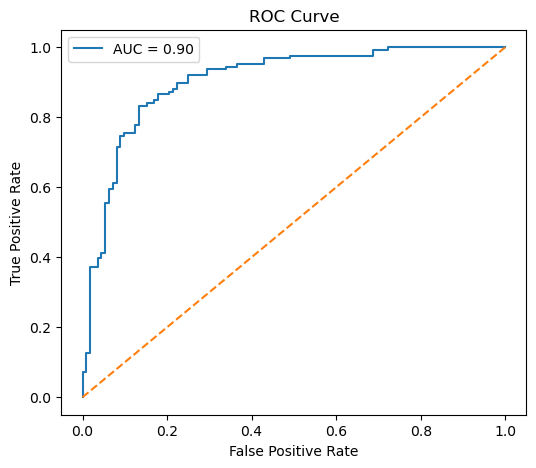

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
